<a href="https://colab.research.google.com/github/jogong2718/AI_club/blob/main/1_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

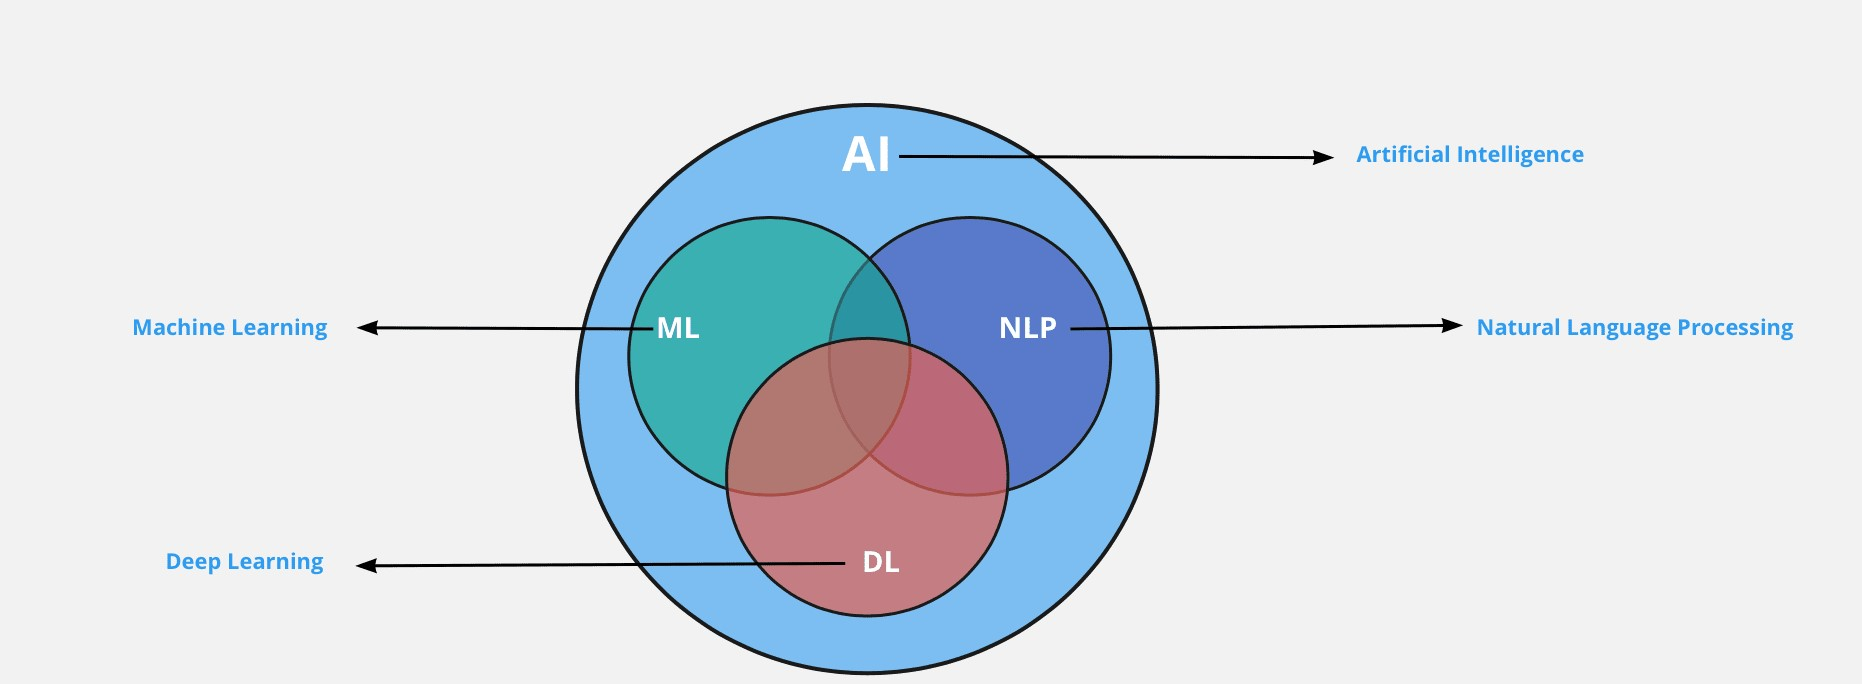



AI is quite a general term, but the main aim of AI is to create intelligent machines that can perform tasks that typically require human intelligence, such as visual perception, speech recognition, decision-making, and language translation. AI systems can be trained with large amounts of data and use algorithms to identify patterns and make predictions or decisions. AI has applications in various fields such as healthcare, finance, transportation, and entertainment. A large part of AI is machine learning, it represents over 60% of todays company applications of AI. It also is partially responsible to all the new technology you have heard of conserning AI. ChatGPT, DALLE, these are just a few examples of models that use machine learning. 

To start learning about Machine learning, we will dive into the world of Neural Networks. This is machine learning's interpretation of the human brain. This notebook will introduce us to neural networks and deep learning (A type of machine learning often using neural networks). The goal is for us to understand how neural networks work, and for us to be able to create our own projects using this technology. 

## Data processing (OHE) and basic Neural Network: First Meeting

In [ ]:
# libraries
# !pip install os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [ ]:
import tensorflow as tf
mnist = tf.keras.datasets.mnist

After importing the libraries and tensorflow framework, we extract the mnist dataset from keras. The mnist dataset is a dataset of handdrawn numbers from zero to nine including labels that label each handdrawn image. Each image is $28 \times 28$ pixels with each pixel gaving a grayscale value (0 to 255), 0 meaning black, 255 meaning white.

In [ ]:
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

11490434/11490434 [==============================] - 2s 0us/step


The first 10 labels of the dataset

In [ ]:
for i in range(10):
  print(training_labels[i])

5
0
4
1
9
2
1
3
1
4


The first ten images in the dataset corresponding to the above labels

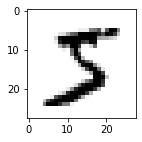

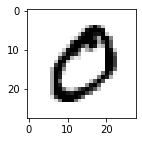

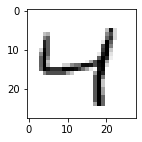

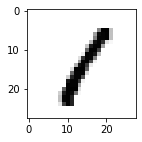

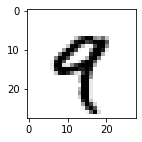

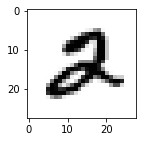

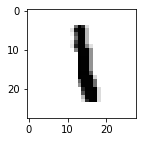

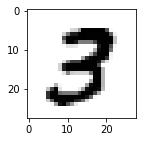

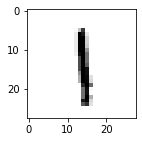

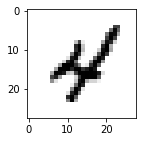

In [ ]:
for i in range(10):
    plt.figure(figsize=(2,2))
    plt.imshow(training_images[i], cmap = "binary")
    plt.show()

<font size = +2>**One-Hot-Encode**

One-Hot-Encoding is one of the most important data transformation techniques in machine learning. The idea behind this process is to help our Models understand the data better by converting our labels into binary sequences. This also will help us when comparing our output of our models to the labels.

For example, the labels that we have seen above would be One-Hot-Encoded as follows: 

$$f([5, 0, 4, 1, 9, 2, 1, 3, 1, 4])$$

$$=$$

$$[[0, 0, 0, 0, 0, 1, 0, 0, 0, 0],$$
$$[1, 0, 0, 0, 0, 0, 0, 0, 0, 0],$$
$$[0, 0, 0, 0, 1, 0, 0, 0, 0, 0],$$
$$[0, 1, 0, 0, 0, 0, 0, 0, 0, 0],$$
$$[0, 0, 0, 0, 0, 0, 0, 0, 0, 1],$$
$$[0, 0, 1, 0, 0, 0, 0, 0, 0, 0],$$
$$[0, 1, 0, 0, 0, 0, 0, 0, 0, 0],$$
$$[0, 0, 0, 1, 0, 0, 0, 0, 0, 0],$$
$$[0, 1, 0, 0, 0, 0, 0, 0, 0, 0],$$
$$[0, 0, 0, 0, 1, 0, 0, 0, 0, 0]]$$

In [ ]:
trainingLabelsohe = tf.keras.utils.to_categorical(training_labels)
testLabelsohe = tf.keras.utils.to_categorical(test_labels)

In [ ]:
for i in range(10):
  print(trainingLabelsohe[i])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


<font size = +2> **TensorFlow**

One-Hot-Encoding is essentially data processing, which means it is essentially the preparation for the model. When building this model, we will first learn about Tensorflow.

Tensorflow is the software library that we will be using when we build our models and implement them in code.

We see here that we define our model as "sequential", which means each each layer has one input and output. In short, each layer get's their input from the layer before it and gives their output to the next layer

In [ ]:
n = 5
model = tf.keras.models.Sequential([
tf.keras.layers.Flatten(), 
tf.keras.layers.Dense(n),
tf.keras.layers.Dense(n),
tf.keras.layers.Dense(10, activation = "softmax")
])


Diagram:

The input nodes should be $28\times28$; however, since I don't want 784 nodes in the diagram, there are only 28 input nodes.


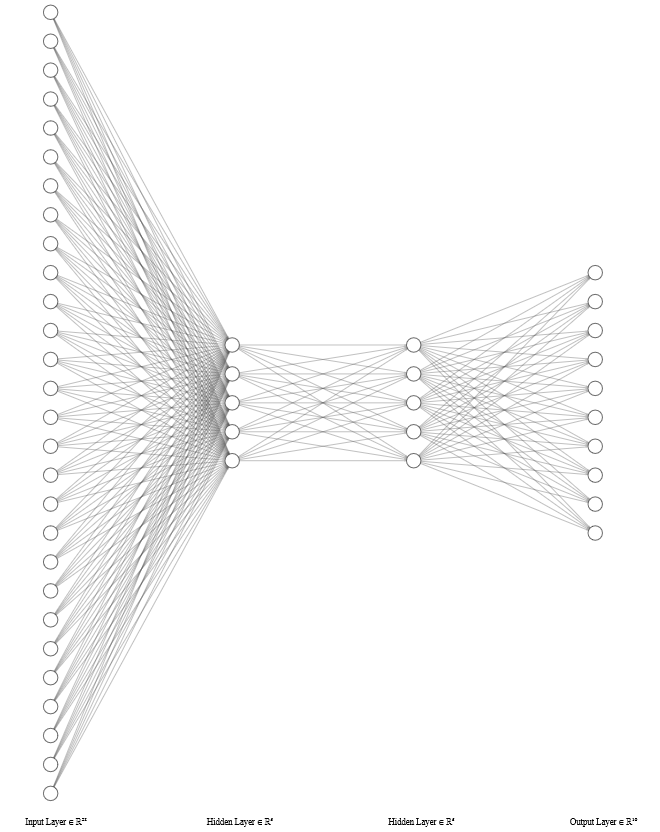

<font size = +5> **Club Activity: Change value of n and number of hidden layers to achieve better results**

# **CHALLENGE FOR INTERMEDIATES**

General function for DNN:

$$ 
f(X) = β_0 + \Sigma_{k=1}^K
β_kg(w_{k0} + \Sigma_{j=1}^p w_{kj} X_j )
$$

the whole function represents one feedforward (only goes in one direction: forward) hidden layer of a neural network. Essentially, the model only has one input layer, one hidden layer, and one output layer.

Now you may look at the function and think two things.
1. Wtf is this
2. Cool, now what in the world does every variable mean?

I want you to think the second thing, as I will try to explain to the best of my ability how this works.

For the hidden layer, the function of each node in a hidden layer is 
$$g(w_{k0} + \Sigma_{j=1}^p w_{kj} X_j )$$
$X$ is the value of the input that feed into the neuron of the hidden layer. This is then multiplied by a weight ($w$) which occurs for each link between neurons. The weight is what determines the "value" or importance of each neuron. In the equation, there are $p$ neurons that feed into a node in the hidden layer, which means the process just described is summed up between each neuron. This is then addded to a bias ($w_{k0}$). The bias adjusts the value of the neuron in case it is an unapplicable value. This of the bias as the $b$ in a linear equation such as $y = ax + b$. $g$ is the activation function that we will discuss next meeting. In short, the activation function determines whether a neuron should be activated or not. 

The number of neurons in a hidden layers is represented by $K$. The parameters $β_0$ and $β_k$ are essentially extra variables to further modify the output of hidden layers. $β_k$ are the weights of the link of the hidden layer neurons to the output neuron. $β_0$ is the bias of these hidden neurons for the output.

## Loss function, optimizer, and activation function: Second Meeting

In [ ]:
with tf.device('/device:GPU:0'):
  model.compile(
      optimizer = "adam",
      loss = "categorical_crossentropy",
      metrics = ["accuracy"]
  )

In [ ]:
history = model.fit(
    training_images, trainingLabelsohe, 
    validation_data = (test_images, testLabelsohe),
    epochs = 10,
    batch_size = 50
)

Epoch 1/10
1200/1200 [==============================] - 3s 3ms/step - loss: 0.4634 - accuracy: 0.8640 - val_loss: 0.4562 - val_accuracy: 0.8690
Epoch 2/10
1200/1200 [==============================] - 3s 3ms/step - loss: 0.4552 - accuracy: 0.8680 - val_loss: 0.4678 - val_accuracy: 0.8595
Epoch 3/10
1200/1200 [==============================] - 3s 3ms/step - loss: 0.4546 - accuracy: 0.8672 - val_loss: 0.4518 - val_accuracy: 0.8751
Epoch 4/10
1200/1200 [==============================] - 3s 3ms/step - loss: 0.4539 - accuracy: 0.8670 - val_loss: 0.4875 - val_accuracy: 0.8624
Epoch 5/10
1200/1200 [==============================] - 3s 3ms/step - loss: 0.4502 - accuracy: 0.8693 - val_loss: 0.4688 - val_accuracy: 0.8734
Epoch 6/10
1200/1200 [==============================] - 3s 3ms/step - loss: 0.4513 - accuracy: 0.8693 - val_loss: 0.4687 - val_accuracy: 0.8714
Epoch 7/10
1200/1200 [==============================] - 3s 3ms/step - loss: 0.4504 - accuracy: 0.8692 - val_loss: 0.4455 - val_accuracy:

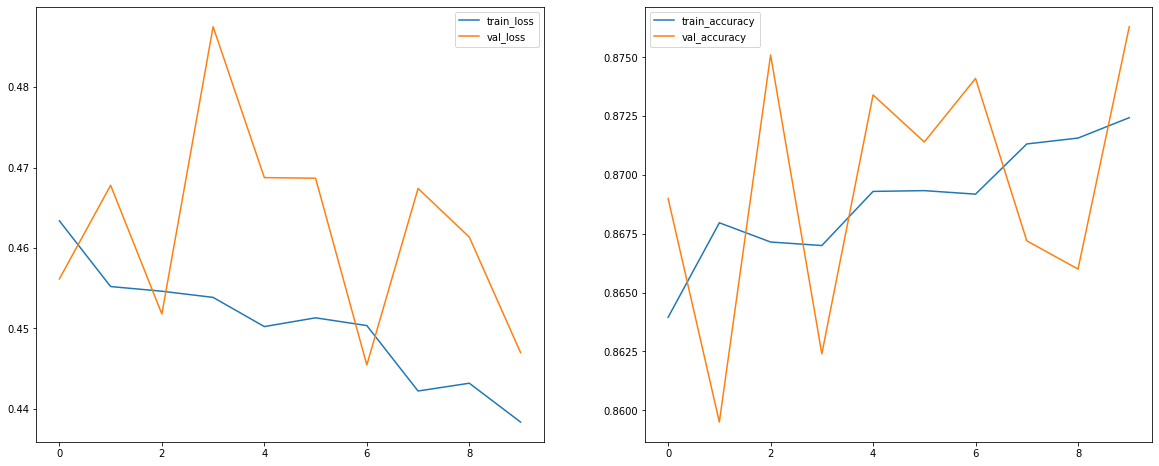

In [ ]:
plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['train_loss', 'val_loss',])
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['train_accuracy', 'val_accuracy'])
plt.show()